# 농식품 구매정보 데이터 시각화

This study was supported by Agricultural Technology Management Research(RS-2020-RD008579) funded by the Rural Development Administration (RDA)


In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore') # 경고 메시지 무시

In [8]:
## 한글 폰트 설정
import os
os.name

import os
if os.name == 'posix' :
    plt.rc('font', family='AppleGothic')    # 맥
else:
    plt.rc('font', family='Malgun Gothic')  # 윈도우

# 마이너스 폰트 깨지는 문제애 대한 대처
plt.rc('axes', unicode_minus=False)

# 레티나 설정을 해주면 글씨가 더 선명해짐
%config InlineBackend.figure_font = 'retina'

In [90]:
## 데이터 불러오기
import chardet

# 파일의 인코딩 감지
with open("fruits1023.csv", 'rb') as file:
    
    raw_data = file.read(10000)  # 파일의 처음 10,000 바이트 읽기
    result = chardet.detect(raw_data)

    encoding = result['encoding']
    print(f"파일 인코딩: {encoding}")


# 감지된 인코딩으로 파일 읽기
df = pd.read_csv("fruits1023.csv", encoding=encoding, encoding_errors='ignore')

print(df.shape)
df.head(3)

파일 인코딩: EUC-KR
(538382, 49)


,year,month,panel_code,panel_code_new,type_method,type_method_etc,type_channel_new,type_channel,type_channel_etc,shop_day,...,retail_new,shop_time,take_out,transport_pre,transport_post,panel_type,edit,family_num_level,age1_group,income_v2
0,2010,1,PN00000001,A20000001,NaN,NaN,슈퍼마켓,기업형슈퍼마켓,NaN,2010-01-19,...,기업형슈퍼마켓,NaN,0,NaN,NaN,0.0,0,3,40,200만원 미만
1,2010,1,PN00000001,A20000001,NaN,NaN,슈퍼마켓,슈퍼마켓,NaN,2010-01-18,...,슈퍼마켓,NaN,0,NaN,NaN,0.0,0,3,40,200만원 미만
2,2010,1,PN00000001,A20000001,NaN,NaN,슈퍼마켓,슈퍼마켓,NaN,2010-01-27,...,슈퍼마켓,NaN,0,NaN,NaN,0.0,0,3,40,200만원 미만


# 1. 데이터 확인

In [91]:
# 변수 기본 정보 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 538382 entries, 0 to 538381
Data columns (total 49 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   year              538382 non-null  int64  
 1   month             538382 non-null  int64  
 2   panel_code        538382 non-null  object 
 3   panel_code_new    491529 non-null  object 
 4   type_method       47699 non-null   object 
 5   type_method_etc   18 non-null      object 
 6   type_channel_new  538382 non-null  object 
 7   type_channel      530370 non-null  object 
 8   type_channel_etc  33 non-null      object 
 9   shop_day          538382 non-null  object 
 10  shop_week         538382 non-null  object 
 11  store             538353 non-null  object 
 12  store_code        35906 non-null   object 
 13  store_region      534267 non-null  object 
 14  product           538381 non-null  object 
 15  product_code      123707 non-null  object 
 16  wide              53

In [92]:
# 수치형 데이터 확인
df.describe()

,year,month,purchase,retail,transport_pre,transport_post,panel_type,family_num_level,age1_group
count,538382.000000,538382.000000,5.383820e+05,0.0,0.0,0.0,538369.000000,538382.000000,538382.000000
mean,2016.476097,6.744826,8.194958e+03,NaN,NaN,NaN,3.753914,3.321422,46.399675
std,4.142759,3.446746,1.028684e+04,NaN,NaN,NaN,7.385211,1.123659,9.879668
min,2010.000000,1.000000,2.000000e+00,NaN,NaN,NaN,0.000000,1.000000,20.000000
25%,2013.000000,4.000000,3.500000e+03,NaN,NaN,NaN,0.000000,3.000000,40.000000
50%,2016.000000,7.000000,5.000000e+03,NaN,NaN,NaN,0.000000,3.000000,50.000000
75%,2020.000000,10.000000,1.000000e+04,NaN,NaN,NaN,0.000000,4.000000,50.000000
max,2023.000000,12.000000,1.200000e+06,NaN,NaN,NaN,21.000000,7.000000,80.000000


## 1.1 결측치 확인 및 삭제

In [144]:
# 결측치
df.isna().sum()

year                     0
month                    0
type_channel_new         0
shop_day                 0
shop_week                0
store                   29
store_region          4115
product                  1
wide                     0
middle                   0
detail                   0
purchase                 0
discount            205117
quantity                 0
q_unit              108763
weight_quantity      14711
multi_quantity       36052
w_q_kg              100460
retail_8             97651
retail_new           97651
shop_time           172198
take_out             97651
panel_type              13
edit                     0
family_num_level         0
age1_group               0
income_v2                0
dtype: int64

In [93]:
# 결측치 비율
df.isna().sum() / len(df) * 100

year                  0.000000
month                 0.000000
panel_code            0.000000
panel_code_new        8.702557
type_method          91.140306
type_method_etc      99.996657
type_channel_new      0.000000
type_channel          1.488163
type_channel_etc     99.993871
shop_day              0.000000
shop_week             0.000000
store                 0.005387
store_code           93.330758
store_region          0.764327
product               0.000186
product_code         77.022449
wide                  0.000000
middle                0.000000
detail                0.000000
country              95.575446
purchase              0.000000
discount             38.098785
quantity              0.000000
q_unit               20.201827
weight_quantity       2.732446
w_q_unit             70.097812
multi_quantity        6.696361
m_unit               79.105728
w_multi_quantity     84.960678
w_multi_unit         93.822045
w_q_kg               18.659613
w_q_kg_unit          82.068308
unit_cos

In [94]:
## 결측치 비율이 70% 이상인 칼럼  삭제

# 결측치 비율 계산
missing_ratios = df.isna().sum() / len(df)

# 결측치 비율이 0.7 이상인 칼럼만 선택
high_missing_cols = missing_ratios[missing_ratios >= 0.7].index

# 결측치 비율이 70% 이상인 칼럼의 개수 출력 
print('결측치 비율이 70% 이상인 칼럼의 개수 : ', len(high_missing_cols))

결측치 비율이 70% 이상인 칼럼의 개수 :  19


In [95]:
# 결측치 비율이 70% 이상인 칼럼을 제외한 새로운 데이터프레임 생성
df.drop(columns=high_missing_cols, inplace=True)

# 확인 
print(df.shape)
df.head(3)

(538382, 30)


,year,month,panel_code,panel_code_new,type_channel_new,type_channel,shop_day,shop_week,store,store_region,...,w_q_kg,retail_8,retail_new,shop_time,take_out,panel_type,edit,family_num_level,age1_group,income_v2
0,2010,1,PN00000001,A20000001,슈퍼마켓,기업형슈퍼마켓,2010-01-19,3,하나로클럽고양점,경기,...,.,3슈퍼마켓,기업형슈퍼마켓,NaN,0,0.0,0,3,40,200만원 미만
1,2010,1,PN00000001,A20000001,슈퍼마켓,슈퍼마켓,2010-01-18,2,소형슈퍼마켓,경기,...,.,3슈퍼마켓,슈퍼마켓,NaN,0,0.0,0,3,40,200만원 미만
2,2010,1,PN00000001,A20000001,슈퍼마켓,슈퍼마켓,2010-01-27,4,소형슈퍼마켓,경기,...,5,3슈퍼마켓,슈퍼마켓,NaN,0,0.0,0,3,40,200만원 미만


## 1.2 불필요한 변수 삭제

In [96]:
## 확인용 코드

# print(df['store'].nunique())
# print(df['store'].unique())

In [97]:
## 의미없는 데이터 적재 칼럼 삭제
cols = ['panel_code', 'panel_code_new', 'type_channel']

df.drop(columns=cols, inplace=True)

# 확인
print(df.shape)
df.head(3)

(538382, 27)


,year,month,type_channel_new,shop_day,shop_week,store,store_region,product,wide,middle,...,w_q_kg,retail_8,retail_new,shop_time,take_out,panel_type,edit,family_num_level,age1_group,income_v2
0,2010,1,슈퍼마켓,2010-01-19,3,하나로클럽고양점,경기,배친환경_,과일류,배,...,.,3슈퍼마켓,기업형슈퍼마켓,NaN,0,0.0,0,3,40,200만원 미만
1,2010,1,슈퍼마켓,2010-01-18,2,소형슈퍼마켓,경기,바나나필리핀,과일류,바나나,...,.,3슈퍼마켓,슈퍼마켓,NaN,0,0.0,0,3,40,200만원 미만
2,2010,1,슈퍼마켓,2010-01-27,4,소형슈퍼마켓,경기,귤,과일류,감귤,...,5,3슈퍼마켓,슈퍼마켓,NaN,0,0.0,0,3,40,200만원 미만


# 2. EDA (Exploratory Data Analysis)

## 2.1 year & month : 연도 & 월

In [99]:
# year
print('unique한 year 개수 : ', df['year'].nunique())
df['year'].unique()

unique한 year 개수 :  14


array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
       2021, 2022, 2023], dtype=int64)

In [100]:
# month
print('unique한 month 개수 : ', df['month'].nunique())
df['month'].unique()

unique한 month 개수 :  12


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [101]:
# 데이터 범위
start_year = df['year'].min()
end_year = df['year'].max()

print('판매 시작 년월 : %s 년 %s 월' % (start_year, df[df['year'] == start_year]['month'].min()))
print('판매 종료 년월 : %s 년 %s 월' % (end_year, df[df['year'] == end_year]['month'].max()))

판매 시작 년월 : 2010 년 1 월
판매 종료 년월 : 2023 년 12 월


In [145]:
# 연도/월별 판매 수량
pd.crosstab(df['year'], df['month']).style.background_gradient(cmap='GnBu')

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2010,3713,3217,3745,3576,3116,2467,3075,4223,3773,4345,4000,3511
2011,3593,2593,3192,3077,2612,2257,2977,4274,3643,4359,3714,3369
2012,3272,2844,3299,2956,2368,2163,3131,4315,3982,3574,3556,2931
2013,3075,2458,3005,2801,2020,2087,2742,3953,3340,3700,3233,2746
2014,3206,2091,2977,2972,2310,2376,3145,3868,3213,3866,3233,3072
2015,3646,3082,3274,3545,3033,2931,3457,4361,4154,4342,3763,3727
2016,3734,2926,3244,3252,2790,2994,3715,4316,3801,4302,3718,3582
2017,3521,2593,3278,3247,2865,2749,3677,4383,4046,3620,3436,3100
2018,2796,2464,2795,2929,2450,2651,3061,3477,3326,3451,3134,2862


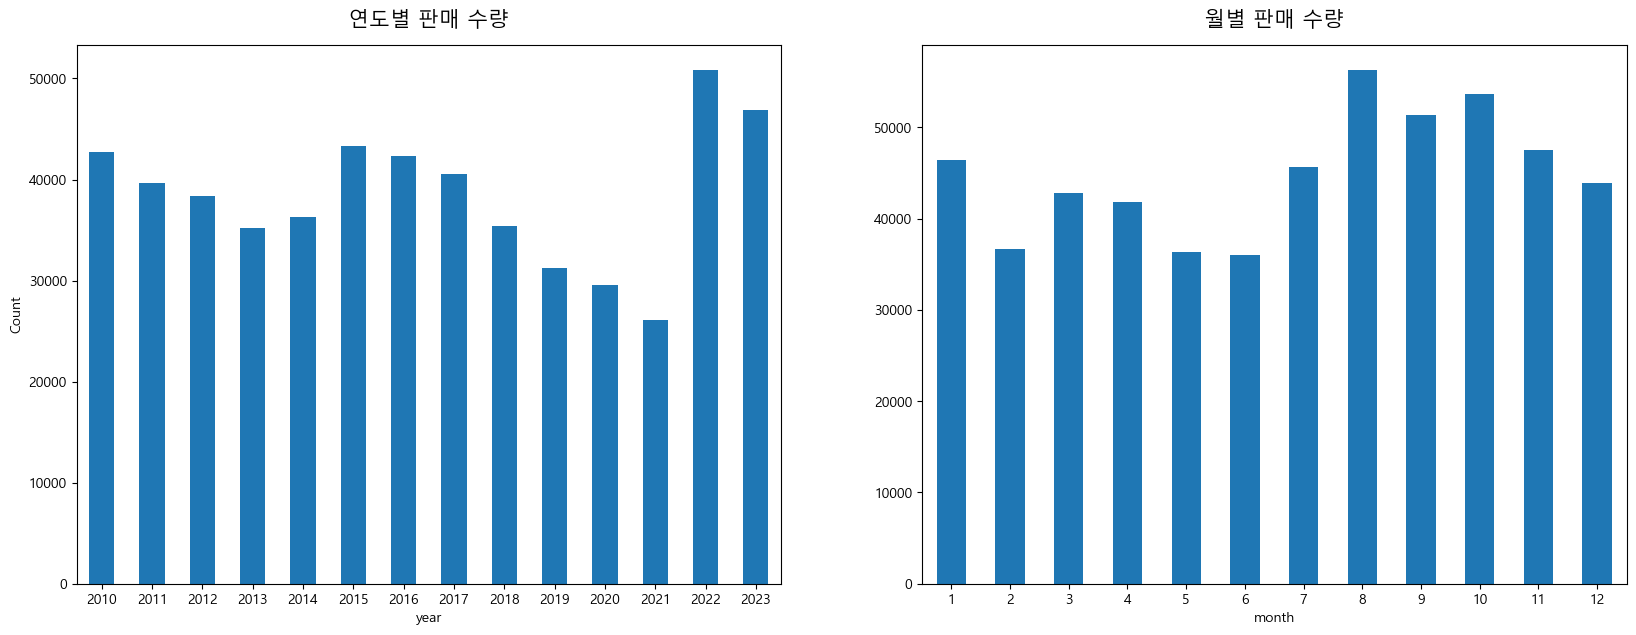

In [164]:
## 시각화
fig, ax = plt.subplots(1, 2, figsize=(20, 7))

df[['year', 'month']].groupby('year').count().plot.bar(legend=False, ax=ax[0])
ax[0].set_title('연도별 판매 수량', fontsize=15, y=1.02)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=0)
ax[0].set_ylabel('Count')

df[['year', 'month']].groupby('month').count().plot.bar(legend=False, ax=ax[1])
ax[1].set_title('월별 판매 수량', fontsize=15, y=1.02)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=0)

plt.subplots_adjust(wspace=0.2)
plt.show()

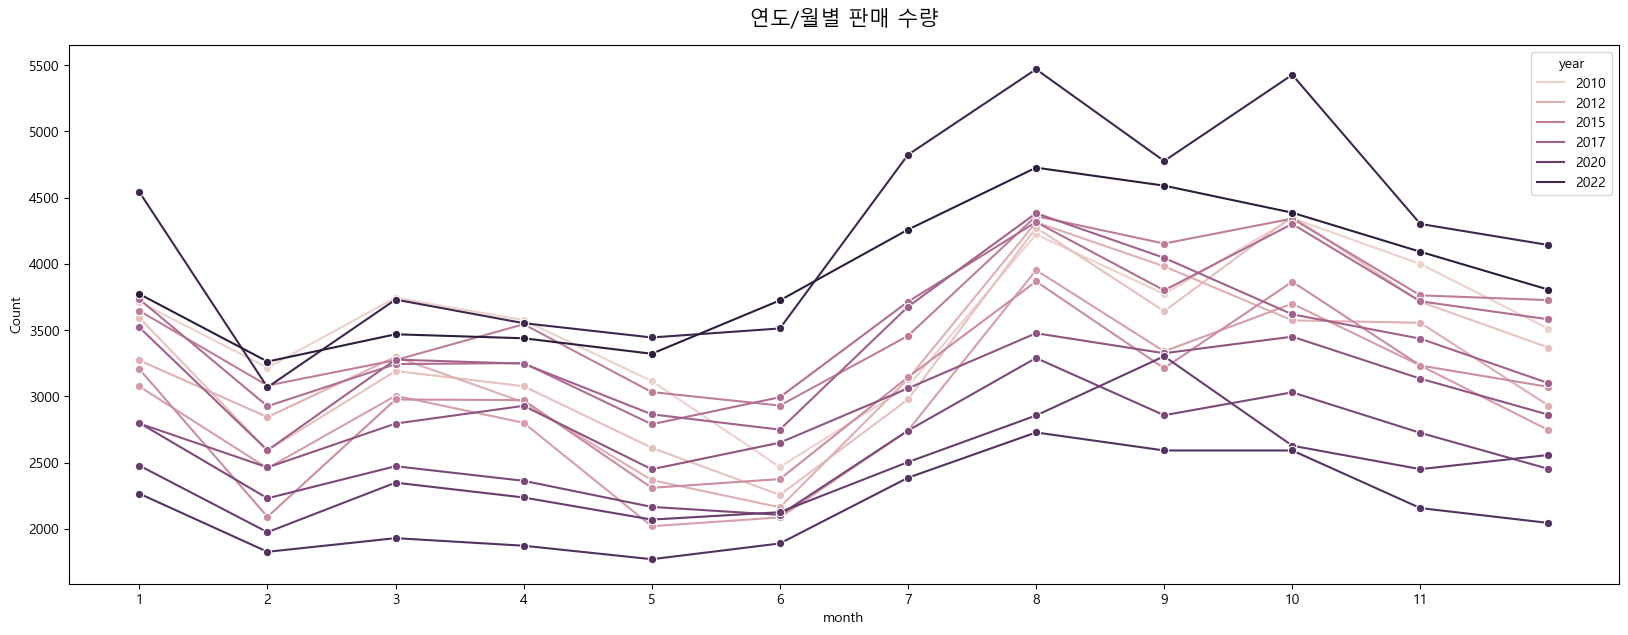

In [141]:
## 시각화
year_month = df.groupby(['year', 'month'])['shop_day'].count().reset_index()

plt.subplots(figsize=(20, 7))
sns.lineplot(data=year_month, x='month', y='shop_day', hue='year', marker='o')

plt.title('연도/월별 판매 수량', fontsize=15, y=1.02)
plt.ylabel('Count')
plt.xticks(range(1, 12, 1))
plt.show()

year & month 정리
- null 개수 : 0
- 판매 기간 : 2010년 1월 ~ 2023년 12월
- 모든 연도/월에서 판매 수량이 확인 됨
- 연도별 판매 수량 : 2022년 > 2023년 > ...
- 월별 판매 수량 : 8월 > 10월 > ...

## 2.2 type_channel_new : 구매 장소

In [143]:
print('unique한 type_cannel_new 개수 : ', df['type_channel_new'].nunique())
df['type_channel_new'].unique()

unique한 type_cannel_new 개수 :  13


array(['슈퍼마켓', '대형마트', '백화점', '전통시장', '무점포', '기타', '온라인몰', '전문점', '편의점',
       '농가직거래', '정육점', '홈쇼핑', '외식업체'], dtype=object)

In [168]:
# 구매 장소별 판매 수량
df['type_channel_new'].value_counts(ascending=False)

type_channel_new
슈퍼마켓     243877
대형마트      96693
전통시장      83058
전문점       37061
무점포       28589
온라인몰      25961
백화점        7640
농가직거래      7459
편의점        3672
기타         3469
홈쇼핑         407
정육점         299
외식업체        197
Name: count, dtype: int64

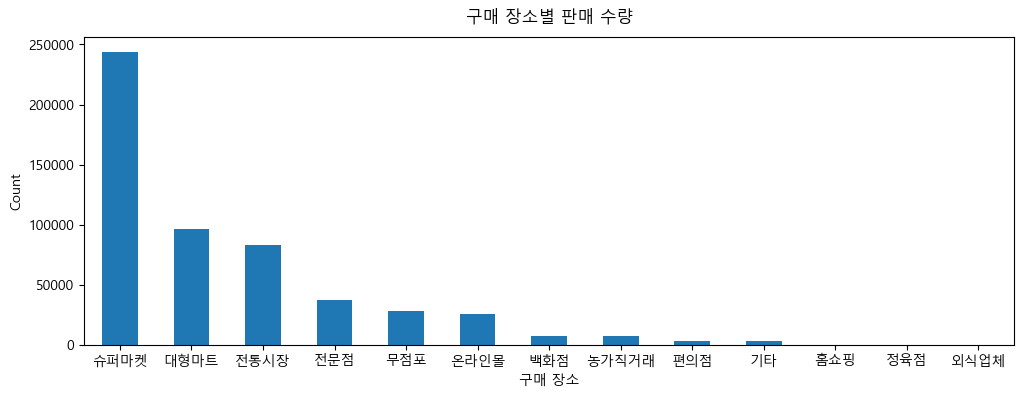

In [170]:
# 시각화
fig, ax = plt.subplots(figsize=(12, 4))

df[['year', 'type_channel_new']].groupby('type_channel_new').count().sort_values('year', ascending=False).plot.bar(legend=False, ax=ax)

ax.set_title('구매 장소별 판매 수량', y=1.02)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_xlabel('구매 장소')
ax.set_ylabel('Count')
plt.show()

type_channel_new 정리
- null 개수 : 0
- 구매 장소별 판매 수량 : 슈퍼마켓 >> 대형마트 > 전통시장 > 전문점 > ...

## 2.3 shop_day : 구입일

In [180]:
print('unique한 shop_day 개수 : ', df['shop_day'].nunique())

unique한 shop_day 개수 :  5113


In [173]:
# 데이터 형태 확인
df['shop_day'].value_counts().head()

shop_day
2022-09-09    328
2022-08-27    283
2018-09-22    272
2015-09-26    270
2022-09-08    260
Name: count, dtype: int64

In [174]:
# datetime형 변환 
df['shop_day'] = pd.to_datetime(df['shop_day'])

# 확인
df['shop_day'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 538382 entries, 0 to 538381
Series name: shop_day
Non-Null Count   Dtype         
--------------   -----         
538382 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 4.1 MB


In [178]:
# day 칼럼 생성
df['day'] = df['shop_day'].dt.day

# 확인
df[['shop_day', 'year', 'month', 'day']].tail(7)

,shop_day,year,month,day
538375,2023-12-10,2023,12,10
538376,2023-12-16,2023,12,16
538377,2023-12-16,2023,12,16
538378,2023-12-18,2023,12,18
538379,2023-12-21,2023,12,21
538380,2023-12-21,2023,12,21
538381,2023-12-25,2023,12,25


shop_day 정리 
- null 개수 : 0
- 5113일 간의 판매 정보가 담긴 데이터
- datetime형 변환 후 day 칼럼 생성

## 2.4 shop_week : 구입 요일

In [185]:
print('unique한 shop_week 개수 : ', df['shop_week'].nunique())
df['shop_week'].unique()

unique한 shop_week 개수 :  15


array([3, 2, 4, 6, 7, 1, 5, '2', '7', '1', '3', '6', '5', '4', '.'],
      dtype=object)

In [186]:
# shop_week이 '.'인 데이터 → 2019-11-23일 데이터
df[df['shop_week'] == '.']

,year,month,type_channel_new,shop_day,shop_week,store,store_region,product,wide,middle,...,retail_8,retail_new,shop_time,take_out,panel_type,edit,family_num_level,age1_group,income_v2,day
381954,2019,11,슈퍼마켓,2019-11-23,.,공단소비자마트,인천,사과_국내산_,과일류,사과,...,3슈퍼마켓,슈퍼마켓,1,0,0.0,0,3,30,600~699만원,23


In [189]:
## shop_week의 '.' 대체
 
# 방법 : shop_week가 '.'인 데이터에서, 동일한 행의 shop_day에 따라 shop_week의 최빈값으로 '.' 값을 대체

# shop_week이 '.'인 데이터의 shop_day
change_day = df[df['shop_week'] == '.']['shop_day'].tolist()

# shop_week이 '.'인 데이터의 shop_day의 shop_week ('.' 포함)
print("shop_week이 '.'인 데이터의 shop_day의 shop_week ('.' 포함) : "
      , df[df['shop_day'].isin(change_day)]['shop_week'].unique().tolist())
print('-------------------------------------------------------')


for i in df[df['shop_week'] == '.'].index :
    shop_day_value = df.loc[i, 'shop_day']

    # shop_day가 같은 행들의 shop_week 값 가져오기
    same_day_weeks = df[df['shop_day'] == shop_day_value]['shop_week']

    # 최빈값 값 계산 (단, '.' 제외)
    mode_value = same_day_weeks[same_day_weeks != '.'].mode()[0]

    # '.'을 유니크한 값으로 대체
    df.loc[i, 'shop_week'] = mode_value 


# 확인
print("shop_week이 '.'였던 데이터의 shop_day의 shop_week : "
      , df[df['shop_day'].isin(change_day)]['shop_week'].unique().tolist())

shop_week이 '.'인 데이터의 shop_day의 shop_week ('.' 포함) :  ['7', '.']
-------------------------------------------------------
shop_week이 '.'였던 데이터의 shop_day의 shop_week :  ['7']


In [193]:
# 확인
print('unique한 shop_week 개수 : ', df['shop_week'].nunique())
df['shop_week'].unique()

unique한 shop_week 개수 :  14


array([3, 2, 4, 6, 7, 1, 5, '2', '7', '1', '3', '6', '5', '4'],
      dtype=object)

In [194]:
## 요일명 한글로 변경

# 문자열 정수형으로 변환
df['shop_week'] = df['shop_week'].astype(int)

# 숫자를 요일로 매핑
week_map = {1 : '일요일'
            , 2 : '월요일'
            , 3 : '화요일'
            , 4 : '수요일'
            , 5 : '목요일'
            , 6 : '금요일'
            , 7 : '토요일'}

df['shop_week'] = df['shop_week'].map(week_map)

In [195]:
# 확인
print('unique한 shop_week 개수 : ', len(df['shop_week'].unique()))
df['shop_week'].unique()

unique한 shop_week 개수 :  7


array(['화요일', '월요일', '수요일', '금요일', '토요일', '일요일', '목요일'], dtype=object)

In [203]:
# 요일별 판매 수량
df['shop_week'].value_counts(ascending=False)

shop_week
토요일    91287
금요일    79075
월요일    74635
목요일    74390
수요일    74030
화요일    72909
일요일    72056
Name: count, dtype: int64

Text(0.5, 0, '구입 요일')

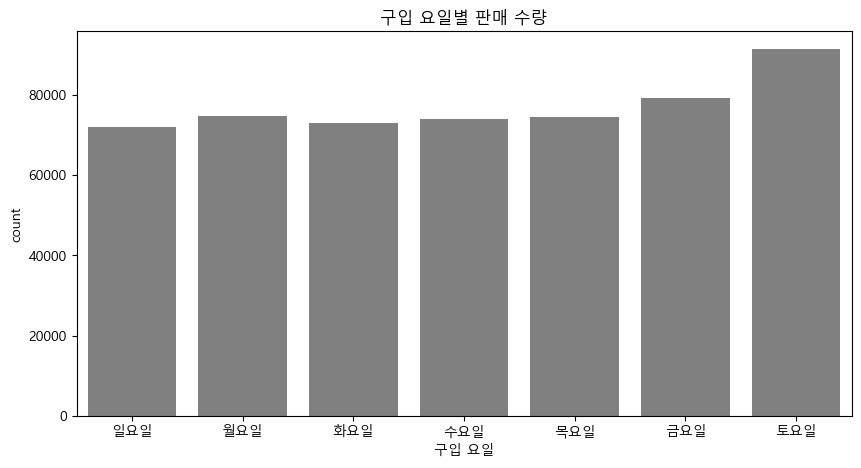

In [202]:
## 시각화
fig, ax = plt.subplots(figsize=(10, 5))

# 요일 순서
week_order = ['일요일', '월요일', '화요일', '수요일', '목요일', '금요일', '토요일']


sns.countplot(data=df, x='shop_week', color='gray', order=week_order)

plt.title('구입 요일별 판매 수량')
plt.xlabel('구입 요일')

shop_week 정리
- null 개수 : 0
- 구입 요일별 판매 수량 : 토요일 > 금요일 > 월요일

## store : 상점명

In [33]:
print('unique한 store 개수 : ', len(df['store'].unique()))
df['store'].unique()

unique한 store 개수 :  24340


array(['하나로클럽고양점', '소형슈퍼마켓', '이마트일산점', ..., '남촌농산물도매시장인농254또맛나상회',
       'GSTHEFRESH연수점', '무점포이레유통'], dtype=object)

In [34]:
df['store'].value_counts()

store
소형슈퍼마켓            60792
재래시장              40018
대형슈퍼마켓            27627
없음                16524
전문점               15250
                  ...  
관우농장                  1
장보남몰옥션                1
인천모래내시장오빠네과일야채        1
드림홈마트(도화점)            1
무점포이레유통               1
Name: count, Length: 24339, dtype: int64

## store_region : 구매 지역

In [35]:
print('unique한 store_region 개수 : ', len(df['store_region'].unique()))
df['store_region'].unique()

unique한 store_region 개수 :  20


array(['경기', '없음', '서울', '인천', '전남', '강원', '제주', '광주', '대전', '충남', '경북',
       '경남', '부산', '전북', '충북', '세종', '대구', '울산', '기타', nan], dtype=object)

In [36]:
# null 개수 및 비율
print('null 개수 : %s' % df['store_region'].isnull().sum())

ratio = df['store_region'].isnull().sum() / len(df)
print('null 비율 : %s' % ratio)

null 개수 : 4115
null 비율 : 0.007643271877588775


In [37]:
# store_region이 null값인 데이터 확인
print('store_region이 null값인 데이터 중 store 빈도수 Top10 : '
      , df[df['store_region'].isna()]['store'].value_counts().sort_values(ascending=False).head(10).index.tolist())

store_region이 null값인 데이터 중 store 빈도수 Top10 :  ['마켓컬리', '쿠팡', '무점포', '없음없음', '오아시스', '이마트몰', '쿠팡로켓프레시', '오아시스마켓', '11번가이마트몰', 'SSG.COM이마트몰']


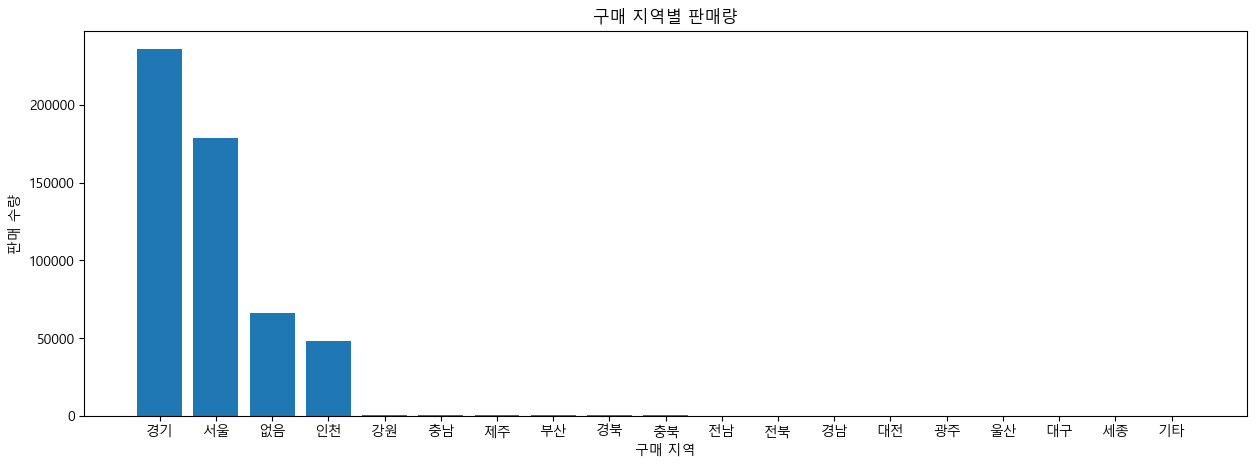

In [38]:
## 구매 지역별 시각화 
sales_by_region = df['store_region'].value_counts().sort_values(ascending=False).copy()

fix, ax = plt.subplots(figsize=(15, 5))

ax.bar(sales_by_region.index, sales_by_region.values)
ax.set_xlabel('구매 지역')
ax.set_ylabel('판매 수량')

plt.title('구매 지역별 판매량')
plt.show()

In [39]:
# 지역별 판매 비율
df['store_region'].value_counts(normalize=True).head(7)

store_region
경기    0.440903
서울    0.334224
없음    0.124054
인천    0.090769
강원    0.001827
충남    0.001361
제주    0.001314
Name: proportion, dtype: float64

In [40]:
# store_region이 '없음'인 데이터 확인
print("store_region이 '없음'인 데이터 중 store 빈도수 Top10 : "
      , df[df['store_region'] == '없음']['store'].value_counts().sort_values(ascending=False).head(10).index.tolist())

store_region이 '없음'인 데이터 중 store 빈도수 Top10 :  ['없음', '노점', '산지직거래', '쿠팡', '기타', '마켓컬리', '농가직거래(방문,기타)', '인터넷구매', '이마트몰', '재래시장']


## product : 상품명

In [41]:
print('unique한 product 개수 : ', len(df['product'].unique()))
df['product'].unique()

unique한 product 개수 :  44025


array(['배친환경_', '바나나필리핀', '귤', ..., '조생귤_M_국산', '조생귤_L_국산', '스위트마운틴_수입'],
      dtype=object)

In [42]:
df['product'].value_counts()

product
바나나           41891
사과            36443
귤             19383
단감            14464
복숭아           11305
              ...  
스텔라벨라청포도팩         1
진영단감_극조생감귤        1
가을햇사과             1
GAP감홍사과           1
스위트마운틴_수입         1
Name: count, Length: 44024, dtype: int64

## wide : 대분류

In [43]:
print('unique한 wide 개수 : ', len(df['wide'].unique()))
df['wide'].unique()

unique한 wide 개수 :  1


array(['과일류'], dtype=object)

## middle : 중분류

In [44]:
print('unique한 middle 개수 : ', len(df['middle'].unique()))
df['middle'].unique()

unique한 middle 개수 :  19


array(['배', '바나나', '감귤', '사과', '단감', '레몬', '떫은감', '오렌지', '참다래', '기타과일',
       '복숭아', '열대과일', '파인애플', '포도', '베리', '체리', '묶음과일', '매실', '자두'],
      dtype=object)

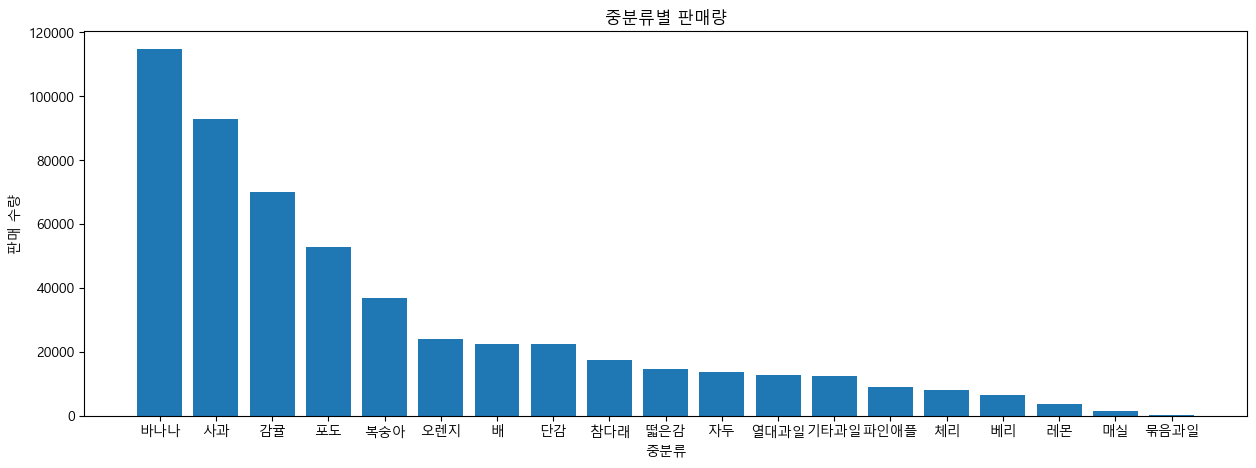

In [45]:
## 중분류별 시각화 
sales_by_middle = df['middle'].value_counts().sort_values(ascending=False).copy()

fix, ax = plt.subplots(figsize=(15, 5))

ax.bar(sales_by_middle.index, sales_by_middle.values)
ax.set_xlabel('중분류')
ax.set_ylabel('판매 수량')

plt.title('중분류별 판매량')
plt.show()

## detail : 소분류

In [46]:
print('unique한 detail 개수 : ', len(df['detail'].unique()))
df['detail'].unique()

unique한 detail 개수 :  59


array(['기타배', '일반바나나', '밀감', '기타사과', '단감', '레몬', '후지', '신고배', '일반떫은감',
       '대봉시', '오렌지', '홍시', '그린키위', '기타과일', '천도', '기타키위', '자몽', '골드키위',
       '파인애플', '대봉', '한라봉', '기타바나나', '석류', '기타포도', '캠벨얼리', '유자', '기타감귤',
       '청견', '세리단', '금귤', '복분자', '기타열대과일', '황도', '적포도', '기타베리', '블루베리',
       '체리', '청포도', '망고', '거봉', '무화과', '묶음과일', '머루포도_MBA_', '매실', '홍로',
       '혼합과일', '델라웨어', '자두', '일반복숭아', '오디', '아오리', '백도', '홍옥', '킹델라웨어',
       '반시', '모과', '기타복숭아', '기타감', '올리브'], dtype=object)

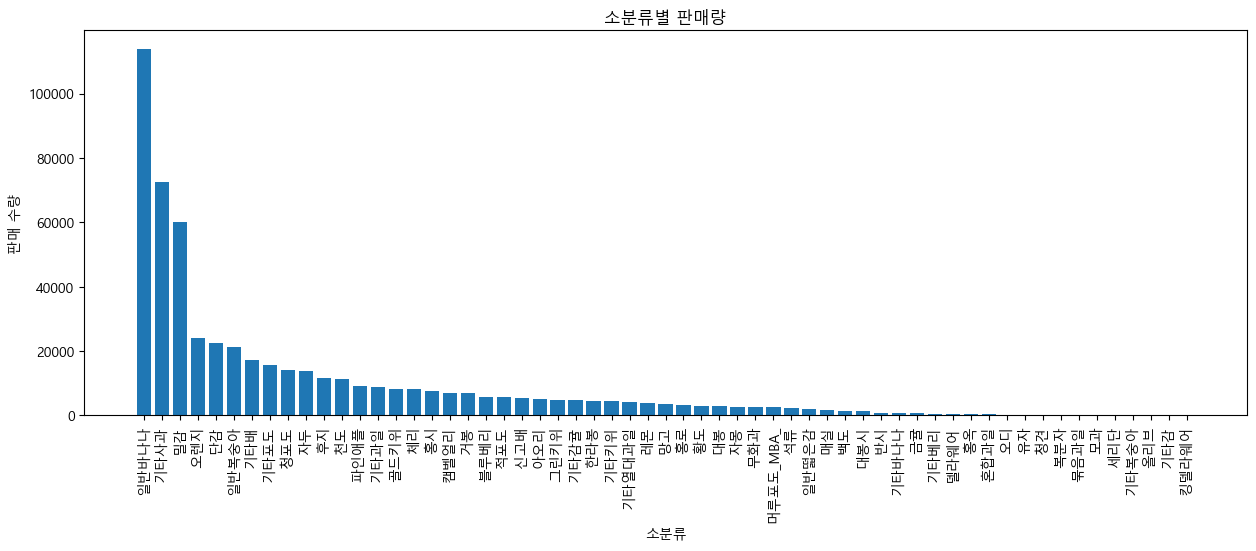

In [47]:
## 소분류별 시각화 
sales_by_detail = df['detail'].value_counts().sort_values(ascending=False).copy()

fix, ax = plt.subplots(figsize=(15, 5))

ax.bar(sales_by_detail.index, sales_by_detail.values)
ax.set_xlabel('소분류')
ax.set_ylabel('판매 수량')

plt.title('소분류별 판매량')
plt.xticks(rotation=90)
plt.show()

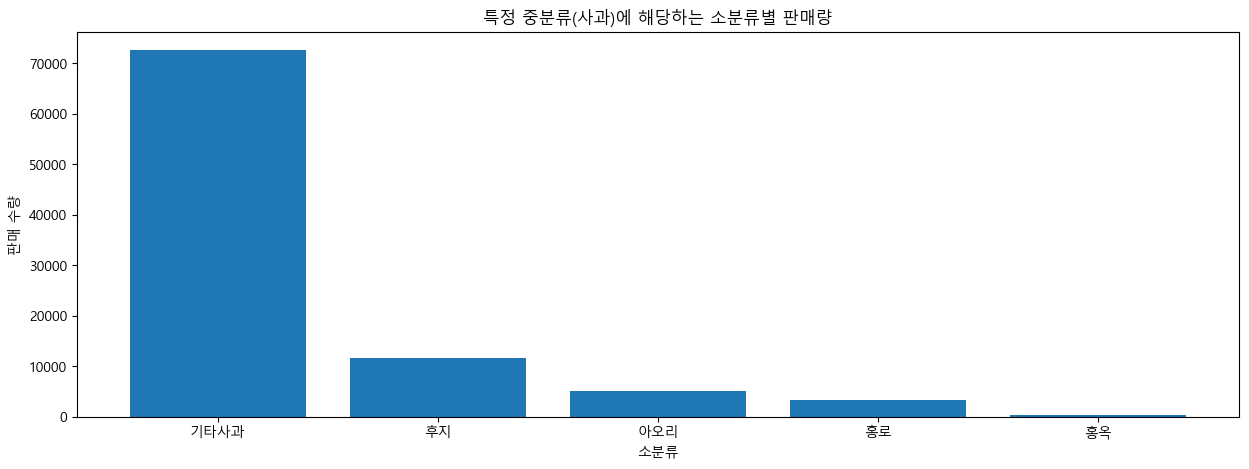

In [48]:
## 특정 중분류(사과)에 해당하는 소분류 시각화 
sales_by_middle_detail = df[df['middle'] == '사과']['detail'].value_counts().sort_values(ascending=False).copy()

fix, ax = plt.subplots(figsize=(15, 5))

ax.bar(sales_by_middle_detail.index, sales_by_middle_detail.values)
ax.set_xlabel('소분류')
ax.set_ylabel('판매 수량')

plt.title('특정 중분류(사과)에 해당하는 소분류별 판매량')
plt.show()

## purchase : 구입액